## Drug Screening Panels Data Analysis

Import required packages and classes

In [35]:
import pharmacoset
import importlib
import utils
import calculations
import myPlots



In [36]:
importlib.reload(pharmacoset) 
importlib.reload(utils)
importlib.reload(myPlots)

from pharmacoset import PharmacoSet
from utils import Tools, DrugAnalysis
from calculations import Correlation
from myPlots import Plotting

### Create PharmacoSets
PharmacoSet class is defined in data.py file.

In [3]:
gdsc_path = "../processed_data/gdsc2_normalized_mapped.tsv"
ccle_path = "../processed_data/ccle_normalized_mapped.tsv"

gdsc = PharmacoSet(filepath= gdsc_path, name= "gdsc2")
ccle = PharmacoSet(filepath= ccle_path, name= "ccle")

gdsc.data.head()


,cell_line,drug,dose,response,dataset
0,CVCL_1045,123138,0.000000,1.0,gdsc2
1,CVCL_1045,123138,0.001001,1.0,gdsc2
2,CVCL_1045,123138,0.003164,1.0,gdsc2
3,CVCL_1045,123138,0.010004,1.0,gdsc2
4,CVCL_1045,123138,0.031631,1.0,gdsc2


Find and filter overlapping cell line - drug pairs.
After using filter_common_pairs method, filtered data can be accessed from PharmacoSet object by '.overlapping_data' accessor. 

In [4]:
common_pairs = Tools.find_common_pairs(gdsc, ccle)
common_pairs

{Pandas(cell_line='CVCL_1796', drug='sorafenib'),
 Pandas(cell_line='CVCL_1723', drug='selumetinib'),
 Pandas(cell_line='CVCL_0419', drug='lapatinib'),
 Pandas(cell_line='CVCL_1636', drug='nilotinib'),
 Pandas(cell_line='CVCL_1058', drug='paclitaxel'),
 Pandas(cell_line='CVCL_1179', drug='topotecan'),
 Pandas(cell_line='CVCL_1405', drug='paclitaxel'),
 Pandas(cell_line='CVCL_1488', drug='sorafenib'),
 Pandas(cell_line='CVCL_1809', drug='crizotinib'),
 Pandas(cell_line='CVCL_1227', drug='crizotinib'),
 Pandas(cell_line='CVCL_1115', drug='crizotinib'),
 Pandas(cell_line='CVCL_1329', drug='paclitaxel'),
 Pandas(cell_line='CVCL_1636', drug='plx-4720'),
 Pandas(cell_line='CVCL_1249', drug='paclitaxel'),
 Pandas(cell_line='CVCL_2075', drug='nilotinib'),
 Pandas(cell_line='CVCL_1352', drug='plx-4720'),
 Pandas(cell_line='CVCL_2061', drug='erlotinib'),
 Pandas(cell_line='CVCL_1196', drug='plx-4720'),
 Pandas(cell_line='CVCL_2034', drug='selumetinib'),
 Pandas(cell_line='CVCL_0099', drug='crizo

In [5]:
gdsc.filter_common_pairs(common_pairs)
ccle.filter_common_pairs(common_pairs)

Find common concetration range of the overlapping data.

In [6]:
common_conc = Tools.common_concentration_ranges(gdsc.overlapping_data, ccle.overlapping_data)
common_conc.head()




,cell_line_,drug_,common_min_dose,common_max_dose
0,cvcl_0012,crizotinib,0.002500,8.0
1,cvcl_0012,erlotinib,0.010005,8.0
2,cvcl_0012,irinotecan,0.005003,5.0
3,cvcl_0012,lapatinib,0.010005,8.0
4,cvcl_0012,nilotinib,0.010005,8.0


Compute AUC between shared concentration range for all drugs across all cell lines for both CCLE and GDSC2.

In [8]:

all_drug_ccle = ccle.get_recomp_auc_values(common_conc, p_filter= 0.05, log_fc= -0.5)
all_drug_gdsc = gdsc.get_recomp_auc_values(common_conc, p_filter= 0.05, log_fc= -0.5)

ccle.recomp_Aucs.head()


,drug,cvcl_0023,cvcl_0026,cvcl_0039,cvcl_0040,cvcl_0060,cvcl_0069,cvcl_0077,cvcl_0099,cvcl_0126,cvcl_0132,cvcl_0134,cvcl_0152,cvcl_0153,cvcl_0186,cvcl_0218,cvcl_0236,cvcl_0291,cvcl_0313,cvcl_0317,cvcl_0318,cvcl_0324,cvcl_0326,cvcl_0333,cvcl_0334,cvcl_0374,cvcl_0379,cvcl_0425,cvcl_0428,cvcl_0434,cvcl_0471,cvcl_0504,cvcl_0505,cvcl_0527,cvcl_0531,cvcl_0547,cvcl_0554,cvcl_0599,cvcl_0600,cvcl_0609,...,cvcl_6c19,cvcl_1221,cvcl_0028,cvcl_0080,cvcl_0332,cvcl_0366,cvcl_0445,cvcl_1084,cvcl_1399,cvcl_1518,cvcl_1544,cvcl_1574,cvcl_1701,cvcl_0459,cvcl_0623,cvcl_1290,cvcl_1475,cvcl_2061,cvcl_0250,cvcl_0359,cvcl_0400,cvcl_0511,cvcl_1186,cvcl_1226,cvcl_1231,cvcl_1247,cvcl_1334,cvcl_1354,cvcl_1479,cvcl_1655,cvcl_1702,cvcl_1714,cvcl_1764,cvcl_2060,cvcl_2092,cvcl_2613,cvcl_2961,cvcl_3007,cvcl_3881,cvcl_4647
0,selumetinib,0.265645,0.283931,0.515655,0.220516,0.213269,0.191445,0.154211,0.295814,0.062349,0.515272,0.271307,0.283400,0.207087,0.225837,0.666931,0.217741,0.189328,0.233210,0.294165,0.388877,0.198519,0.109006,0.159892,0.255475,0.244900,0.488551,2.226659e-01,0.402667,0.253702,0.089812,0.255610,2.654771e-01,0.407737,0.071760,0.410940,0.159431,0.259034,0.067986,0.128097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,erlotinib,0.030517,NaN,NaN,0.002785,0.053514,NaN,NaN,NaN,0.114195,0.035070,0.008116,NaN,NaN,0.149836,NaN,0.001675,NaN,NaN,NaN,0.019258,0.046865,NaN,0.010904,NaN,NaN,0.000101,7.284564e-09,NaN,NaN,0.062303,NaN,1.817170e-01,0.066703,0.000397,NaN,0.111423,NaN,NaN,0.087064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,irinotecan,0.407823,0.256881,0.258169,NaN,NaN,0.285969,NaN,NaN,0.600389,0.519196,0.607020,0.363927,0.478659,NaN,NaN,NaN,0.439173,NaN,NaN,0.343645,0.265072,0.090351,NaN,0.087957,0.399368,0.340294,3.632652e-01,0.456615,0.545693,0.548172,0.439114,1.991179e-01,0.454509,NaN,0.543623,0.563421,0.445710,0.152990,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lapatinib,0.144827,NaN,NaN,NaN,NaN,NaN,NaN,0.061880,0.199385,NaN,0.088221,0.083302,NaN,0.209220,NaN,NaN,0.006432,0.163178,NaN,0.069088,0.072623,NaN,NaN,NaN,NaN,NaN,9.148755e-03,0.056746,NaN,0.210590,0.051590,2.162024e-01,NaN,NaN,NaN,0.049544,0.031482,0.107807,0.432940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nilotinib,0.004687,0.000057,0.067482,NaN,NaN,NaN,NaN,0.012599,0.000060,0.056225,0.011845,0.029872,0.002225,NaN,0.019148,NaN,NaN,NaN,NaN,0.017284,NaN,0.107083,0.010627,NaN,NaN,0.646274,4.952148e-01,0.000171,0.006575,NaN,0.024409,1.655714e-08,0.049487,0.005859,NaN,NaN,0.009501,0.014217,0.005101,...,2.165465e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Correlation between Published AUC values of GDSC2 and CCLE, plot for Lapatinib

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


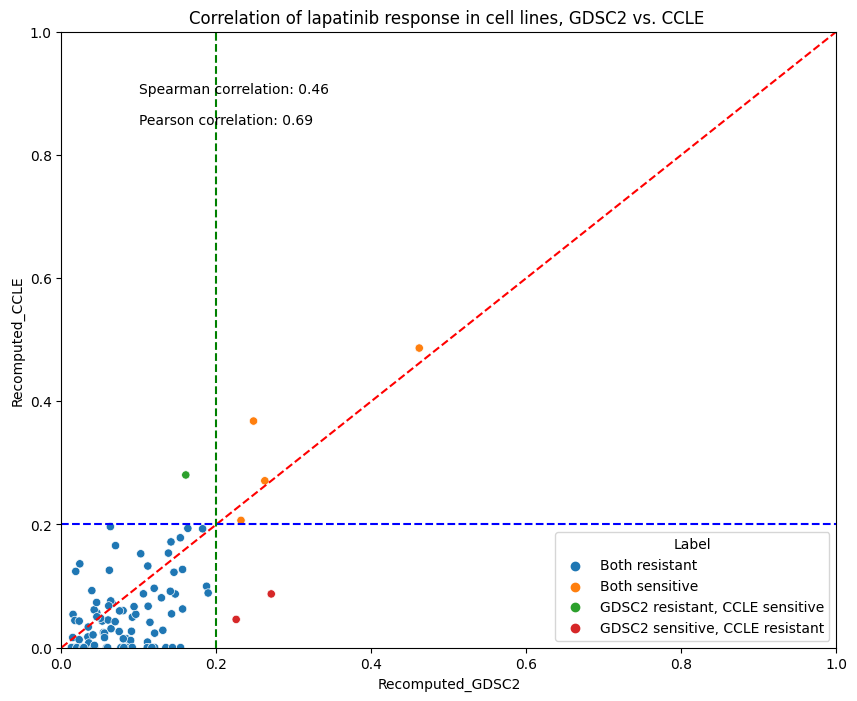

In [11]:
Plotting.correlation_plot(gdsc, ccle, "lapatinib", method= 'published')

Correlation between Recomputed AUC values. Curves were fitted by CurveCurator, AUC is calculated between shared range of GDSC2 and CCLE. Plot for Lapatinib

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


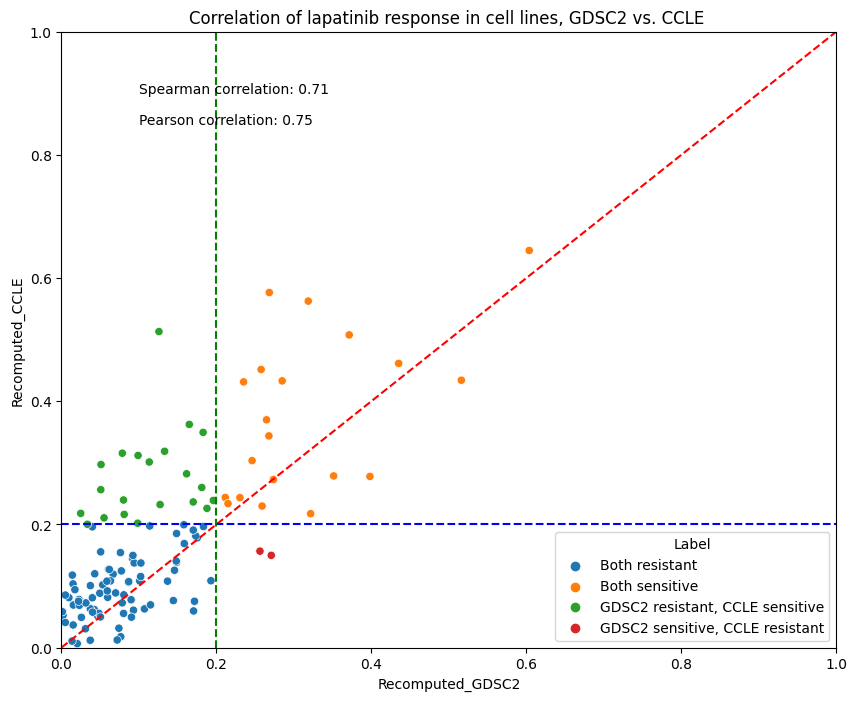

In [12]:
Plotting.correlation_plot(gdsc, ccle, "lapatinib", method= 'recomputed')

Create correlation coefficient table for Published and Recomputed values. 

In [27]:

result = Correlation.recomp_vs_pub_corr_table(ccle, gdsc, "spearman")
result

,drug,pub_corr,recomp_corr,pub_size,recomp_size,p-value
0,selumetinib,0.673984,0.722097,98,82,0.536986
1,erlotinib,0.369209,0.634249,97,43,0.055851
2,irinotecan,0.683540,0.684848,54,136,0.988091
3,lapatinib,0.459762,0.705202,98,122,0.005674
4,nilotinib,0.161850,0.523810,78,35,0.047588
5,paclitaxel,0.448946,0.479298,98,204,0.755967
6,pd0325901,0.829573,0.634675,98,18,0.115283
7,palbociclib,0.335628,0.696623,85,40,0.009795
8,crizotinib,0.271352,0.442130,98,174,0.124532
9,plx-4720,0.503061,0.823613,97,38,0.001912


Barplot to compare correlation coefficients 

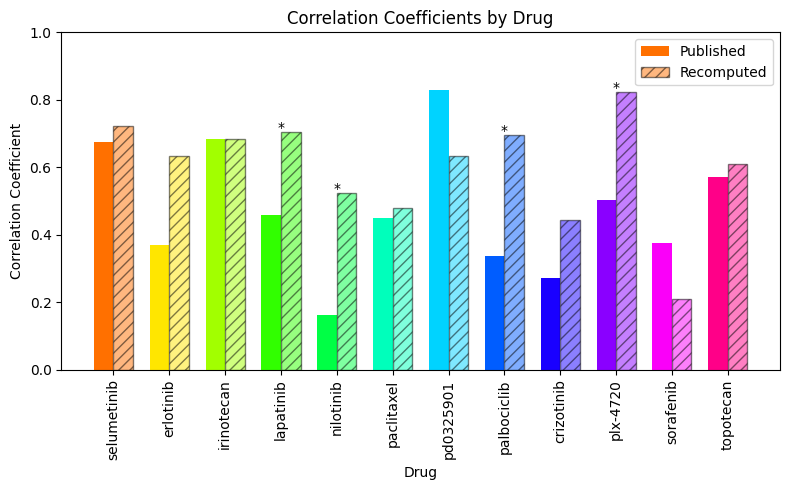

In [37]:
Plotting.barplot_corr_table(result)